In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [17]:
data = pd.read_csv('laptop_buying_data.csv')
data

,Customer ID,Age,Gender,Occupation,Income,Brand Preference,Previous Purchases,Purchase Intention
0,1,42,Male,Business Owner,87913,Dell,2,0
1,2,23,Male,Professional,78802,Lenovo,2,1
2,3,51,Female,Professional,22702,HP,4,0
3,4,35,Female,Professional,89576,Lenovo,3,0
4,5,37,Female,Student,90387,Apple,4,0
...,...,...,...,...,...,...,...,...
995,996,22,Female,Professional,36228,HP,3,0
996,997,37,Male,Student,31245,Apple,1,0
997,998,28,Male,Professional,53668,Lenovo,2,0
998,999,19,Female,Student,55492,Apple,0,1


In [18]:
x= data[['Age', 'Gender', 'Occupation', 'Income', 'Brand Preference', 'Previous Purchases']]
x= pd.get_dummies(x)
x

,Age,Income,Previous Purchases,Gender_Female,Gender_Male,Occupation_Business Owner,Occupation_Professional,Occupation_Student,Brand Preference_Apple,Brand Preference_Dell,Brand Preference_HP,Brand Preference_Lenovo
0,42,87913,2,False,True,True,False,False,False,True,False,False
1,23,78802,2,False,True,False,True,False,False,False,False,True
2,51,22702,4,True,False,False,True,False,False,False,True,False
3,35,89576,3,True,False,False,True,False,False,False,False,True
4,37,90387,4,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,36228,3,True,False,False,True,False,False,False,True,False
996,37,31245,1,False,True,False,False,True,True,False,False,False
997,28,53668,2,False,True,False,True,False,False,False,False,True
998,19,55492,0,True,False,False,False,True,True,False,False,False


In [19]:
y = data['Purchase Intention']
y

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: Purchase Intention, Length: 1000, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
id3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [24]:
y_pred= id3.predict(x_test)

In [26]:
confusion_mat= confusion_matrix(y_test, y_pred)
confusion_mat

array([[141,  56],
       [ 72,  31]], dtype=int64)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5733333333333334

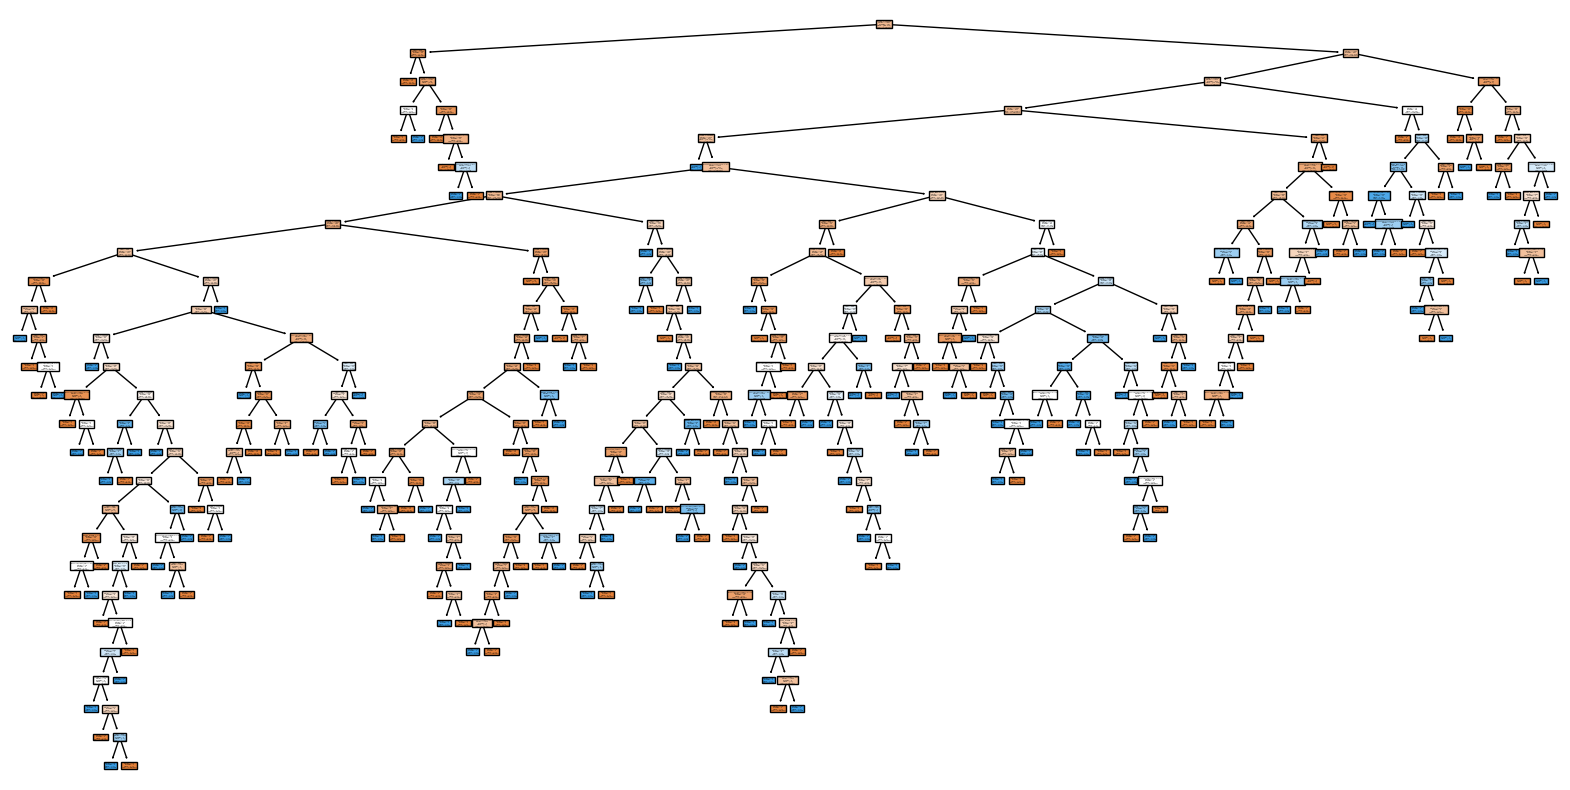

In [31]:
plt.figure(figsize=(20,10))
tree.plot_tree(id3, filled= True, feature_names=x.columns, class_names=['No Purchase', 'Purchase'])
plt.show()